<a href="https://colab.research.google.com/github/ladiff777/Computer-Vision_7th-sem/blob/main/Experiment%203.2%20and%203.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#AIM: Write a program to examine the performance of various pretrained deep learning models for real-time object tracking tasks.


# Import the required libraries
import cv2
import tensorflow as tf

# Load the pretrained deep learning model (MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Initialize the video stream
video_stream = cv2.VideoCapture(0)

while True:
    # Read a frame from the video stream
    ret, frame = video_stream.read()

    if not ret:
        break

    # Preprocess the frame if required (resize to 224x224 for MobileNetV2)
    frame = cv2.resize(frame, (224, 224))
    frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)

    # Perform object detection and tracking
    # Predict using MobileNetV2
    predictions = model.predict(frame.reshape(1, 224, 224, 3))
    predicted_class = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)[0][0][1]

    # Visualize the tracked objects (draw bounding box with class label)
    cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Object Tracking', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video stream
video_stream.release()

# Close all windows
cv2.destroyAllWindows()


1/1 [==============================] - 1s 932ms/step


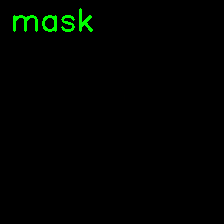

1/1 [==============================] - 0s 54ms/step


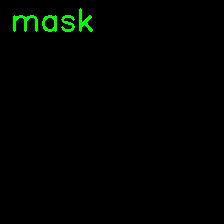

1/1 [==============================] - 0s 51ms/step


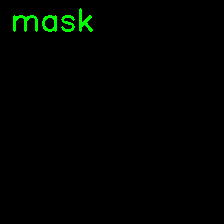

1/1 [==============================] - 0s 51ms/step


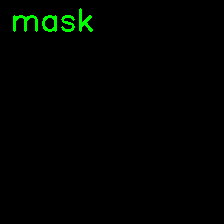

1/1 [==============================] - 0s 53ms/step


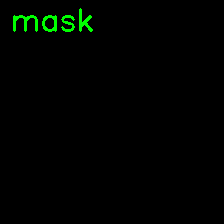

1/1 [==============================] - 0s 54ms/step


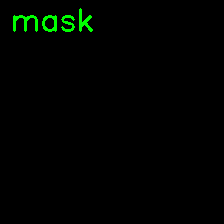

1/1 [==============================] - 0s 66ms/step


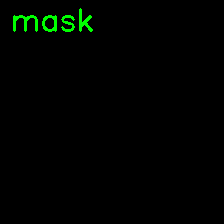

1/1 [==============================] - 0s 53ms/step


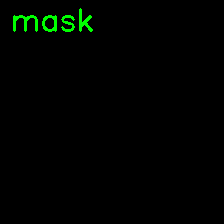

1/1 [==============================] - 0s 68ms/step


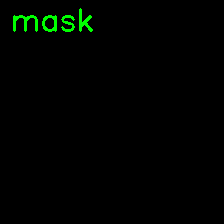

1/1 [==============================] - 0s 50ms/step


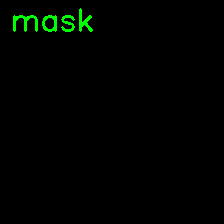

1/1 [==============================] - 0s 52ms/step


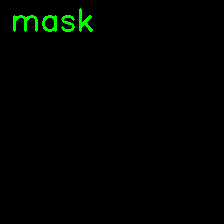

1/1 [==============================] - 0s 54ms/step


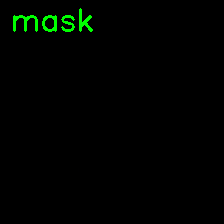

1/1 [==============================] - 0s 53ms/step


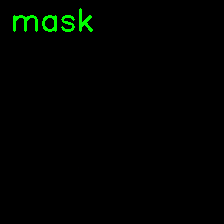

1/1 [==============================] - 0s 54ms/step


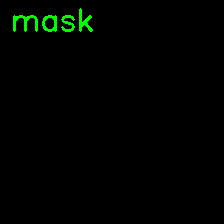

1/1 [==============================] - 0s 56ms/step


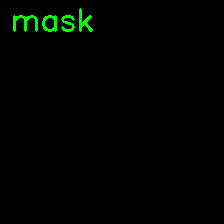

1/1 [==============================] - 0s 52ms/step


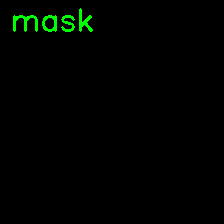

1/1 [==============================] - 0s 52ms/step


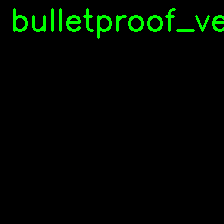

1/1 [==============================] - 0s 52ms/step


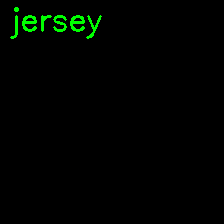

1/1 [==============================] - 0s 54ms/step


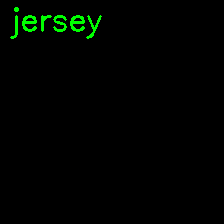

1/1 [==============================] - 0s 55ms/step


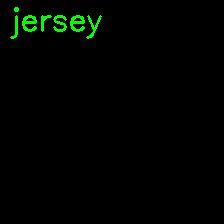

1/1 [==============================] - 0s 53ms/step


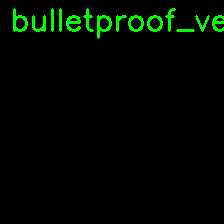

1/1 [==============================] - 0s 59ms/step


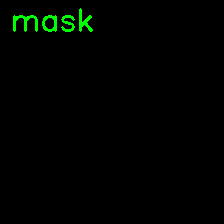

1/1 [==============================] - 0s 54ms/step


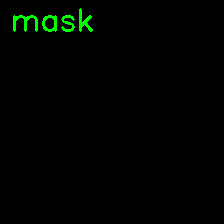

1/1 [==============================] - 0s 55ms/step


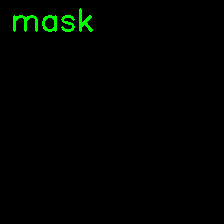

1/1 [==============================] - 0s 51ms/step


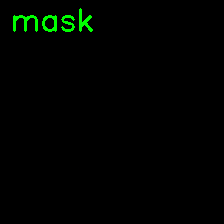

1/1 [==============================] - 0s 56ms/step


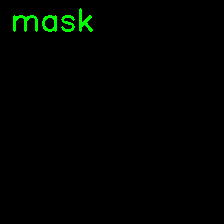

1/1 [==============================] - 0s 52ms/step


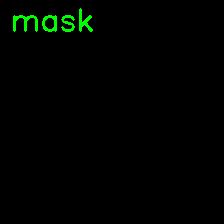

1/1 [==============================] - 0s 51ms/step


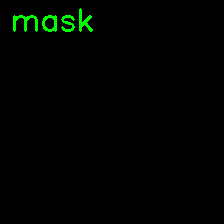

1/1 [==============================] - 0s 50ms/step


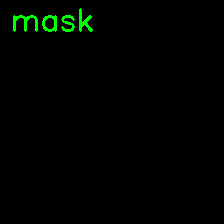

1/1 [==============================] - 0s 52ms/step


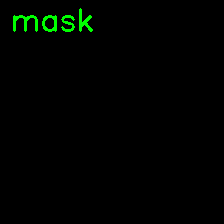

1/1 [==============================] - 0s 53ms/step


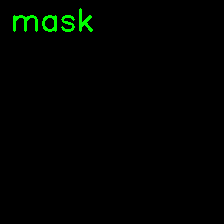

1/1 [==============================] - 0s 62ms/step


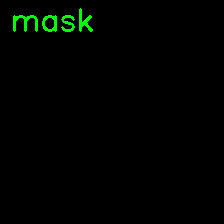

1/1 [==============================] - 0s 53ms/step


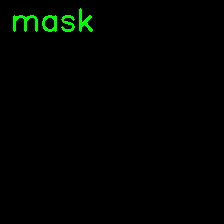

1/1 [==============================] - 0s 52ms/step


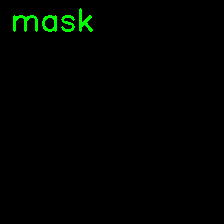

1/1 [==============================] - 0s 52ms/step


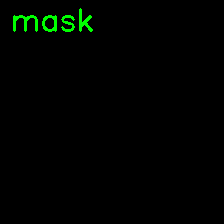

1/1 [==============================] - 0s 56ms/step


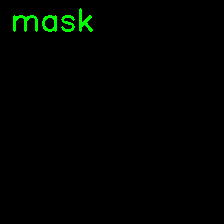

1/1 [==============================] - 0s 53ms/step


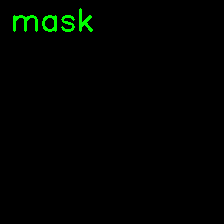

1/1 [==============================] - 0s 55ms/step


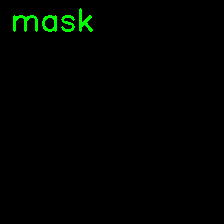

1/1 [==============================] - 0s 58ms/step


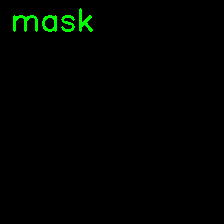

1/1 [==============================] - 0s 63ms/step


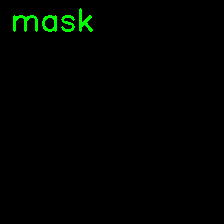

1/1 [==============================] - 0s 83ms/step


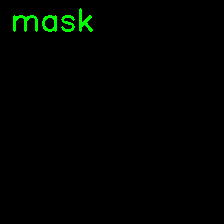

1/1 [==============================] - 0s 88ms/step


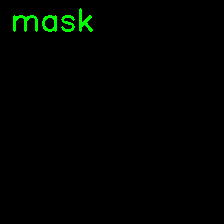

1/1 [==============================] - 0s 86ms/step


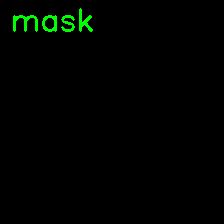

1/1 [==============================] - 0s 80ms/step


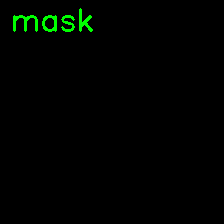

1/1 [==============================] - 0s 81ms/step


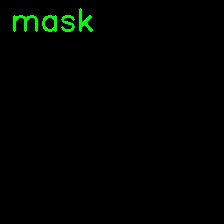

1/1 [==============================] - 0s 92ms/step


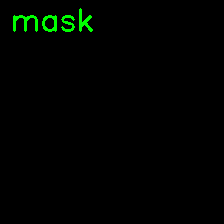

1/1 [==============================] - 0s 82ms/step


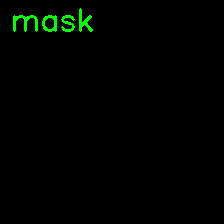

In [14]:
# Import the required libraries
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Load the pretrained deep learning model (MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Initialize the video stream with a video file
video_stream = cv2.VideoCapture('/content/WIN_20231109_08_54_48_Pro.mp4')  # Replace with the path to your video file

while True:
    # Read a frame from the video stream
    ret, frame = video_stream.read()

    if not ret:
        break

    # Preprocess the frame if required (resize to 224x224 for MobileNetV2)
    frame = cv2.resize(frame, (224, 224))
    frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)

    # Perform object detection and tracking
    # Predict using MobileNetV2
    predictions = model.predict(frame.reshape(1, 224, 224, 3))
    predicted_class = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)[0][0][1]

    # Visualize the tracked objects (draw bounding box with class label)
    cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame using cv2_imshow
    cv2_imshow(frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video stream
video_stream.release()


In [18]:

#AIM- Write a program to interpret the effectiveness of template matching techniques for video stabilization tasks

import cv2
import numpy as np

# Function to stabilize a video using template matching
def stabilize_video(input_video_path, output_video_path, template, threshold=0.9):
    # Load the video
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        print("Error: Video file not found.")
        return

    # Get the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Cannot read video frame.")
        return

    # Get the height and width of the frame
    height, width, _ = prev_frame.shape

    # Define the template size and position
    th, tw = template.shape[:2]
    x, y = 0, 0  # Initialize template position

    # Create VideoWriter for the stabilized video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Perform template matching
        result = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > threshold:
            x, y = max_loc

        # Calculate the translation matrix
        translation_matrix = np.float32([[1, 0, x - tw // 2], [0, 1, y - th // 2]])
        stabilized_frame = cv2.warpAffine(frame, translation_matrix, (width, height))

        out.write(stabilized_frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Specify the path to the input video and the template image
input_video_path = '/content/WIN_20231109_08_54_48_Pro.mp4'  # Replace with your video file
output_video_path = 'stabilized_video.avi'
template = cv2.imread('/content/template_img.png', cv2.IMREAD_COLOR)  # Replace with your template image

# Stabilize the video and save the result
stabilize_video(input_video_path, output_video_path, template)
